In [15]:
from graph_tool.all import*
from matplotlib.pyplot import*
import numpy as np

dim=10
gamma=1
ND=50
X=[]

g = lattice([dim,dim],periodic=True)

In [16]:
def sis_model(betta):
    state = SISState(g, beta=betta, gamma=gamma)
    X = []
    for t in range(ND):
        ret = state.iterate_sync()
        X.append(state.get_state().fa.sum())
    return X

In [17]:
def sis_mean(b):
    I=np.zeros(ND)
    Snodes=np.zeros(ND)
    I_all=[]
    for j in range(number_runs):
        I_all.append(sis_model(b))
    for d in range(ND):
        for n in range(number_runs):
            I[d]+=I_all[n][d]
        I[d]/=number_runs
        Snodes[d]=dim**2 - I[d]
    return I , Snodes

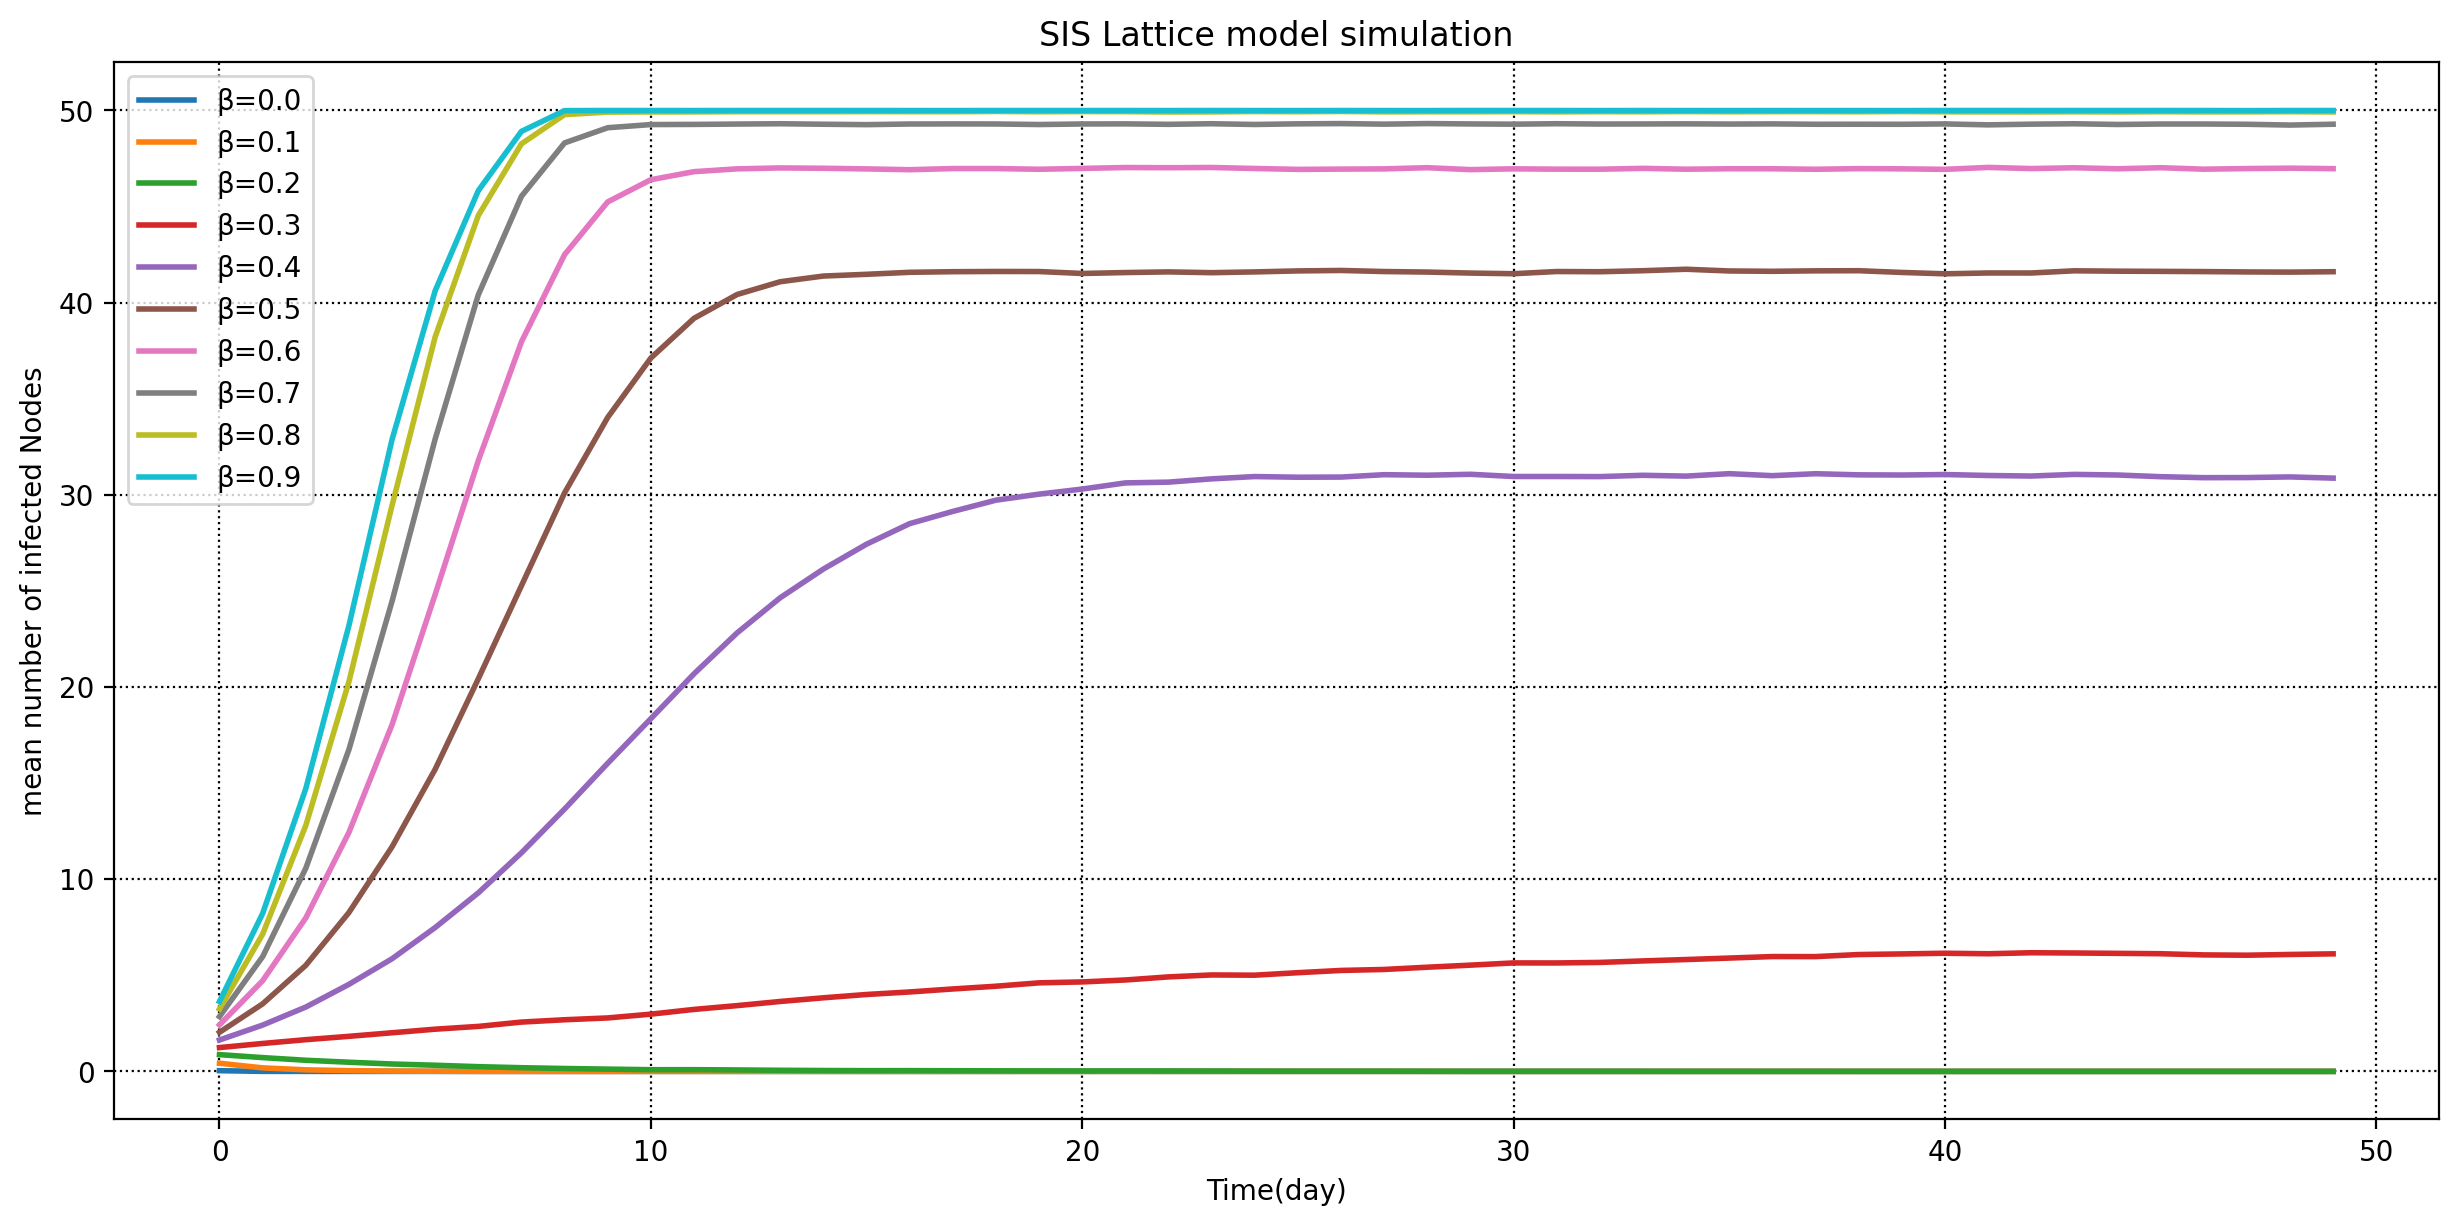

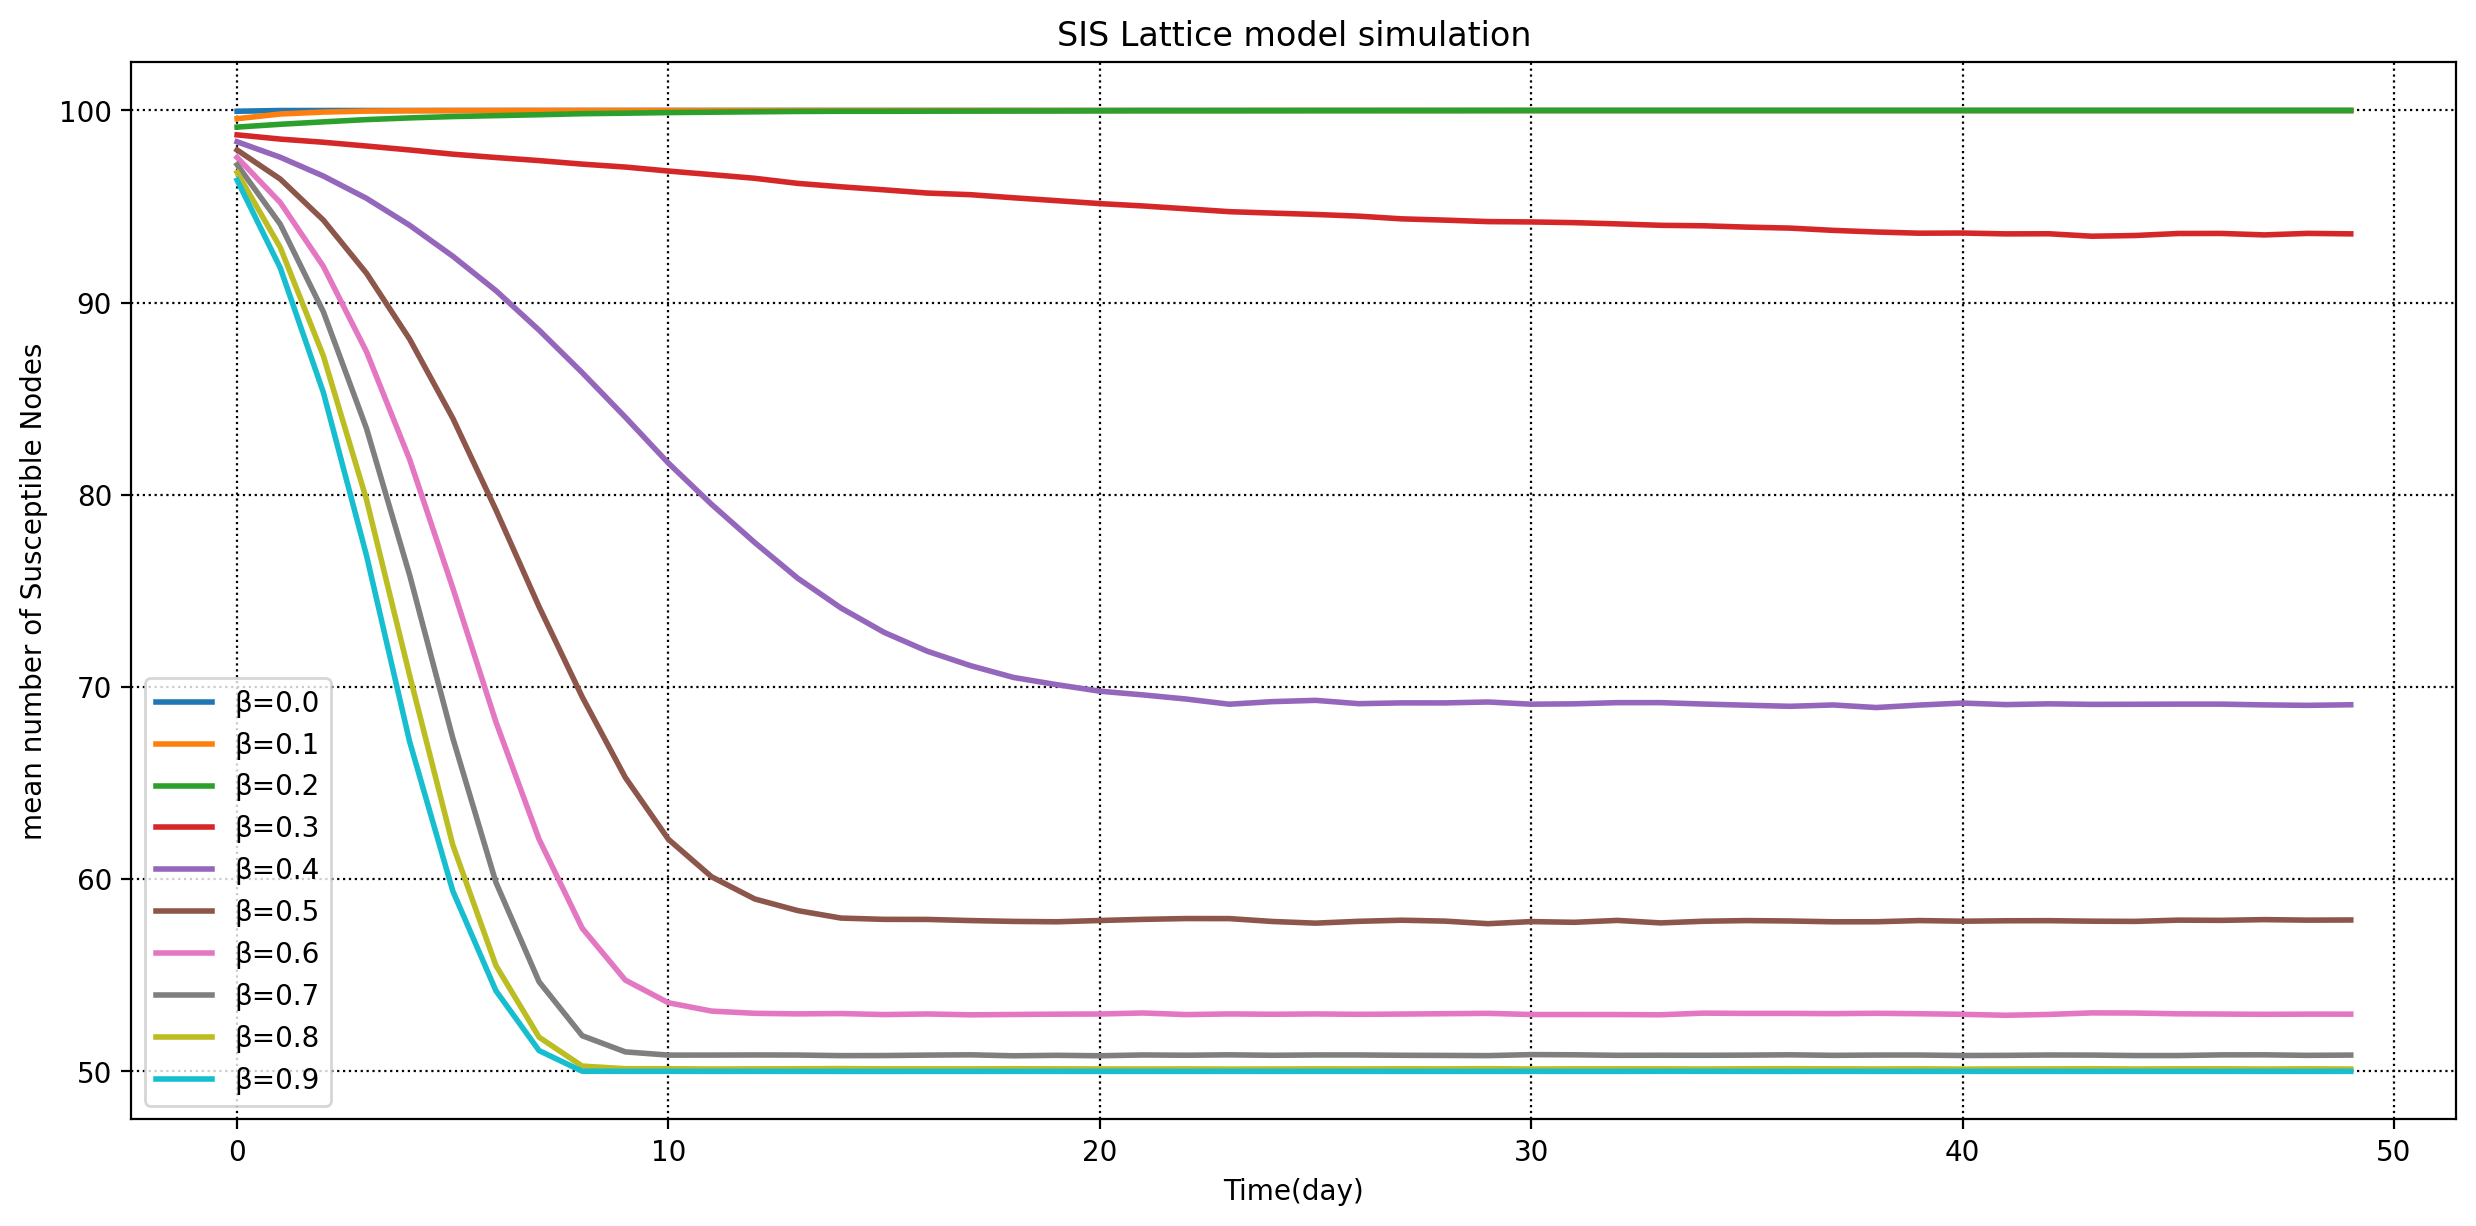

In [18]:
figure(figsize=(15,7),dpi=200)
grid(color = 'k', linestyle = ':')
title("SIS Lattice model simulation")
ylabel("mean number of infected Nodes")
xlabel("Time(day)")
number_plots=10
number_runs=1500
for i in range(number_plots):
    (Ilist,Slist)=sis_mean(0.21 + (i-2)/number_plots)
    plot(Ilist,label='β={:.1f}'.format(0.21 + (i-2)/number_plots),lw=2)
legend()
savefig('SIS(INN)')
show()

figure(figsize=(15,7),dpi=200)
grid(color = 'k', linestyle = ':')
title("SIS Lattice model simulation")
ylabel("mean number of Susceptible Nodes")
xlabel("Time(day)")
for i in range(number_plots):
    (Ilist,Slist)=sis_mean(0.21 + (i-2)/number_plots)
    plot(Slist,label='β={:.1f}'.format(0.21 + (i-2)/number_plots),lw=2)
legend()
savefig('SIS(SNN)')
show()

In [19]:
#number_runs=1000
betta = np.linspace(0,1,num=100)
inf=[]
sus=[]
for i in betta:
    (ii,ss)=sis_mean(i)
    inf.append(ii[-1])
    sus.append(ss[-1])

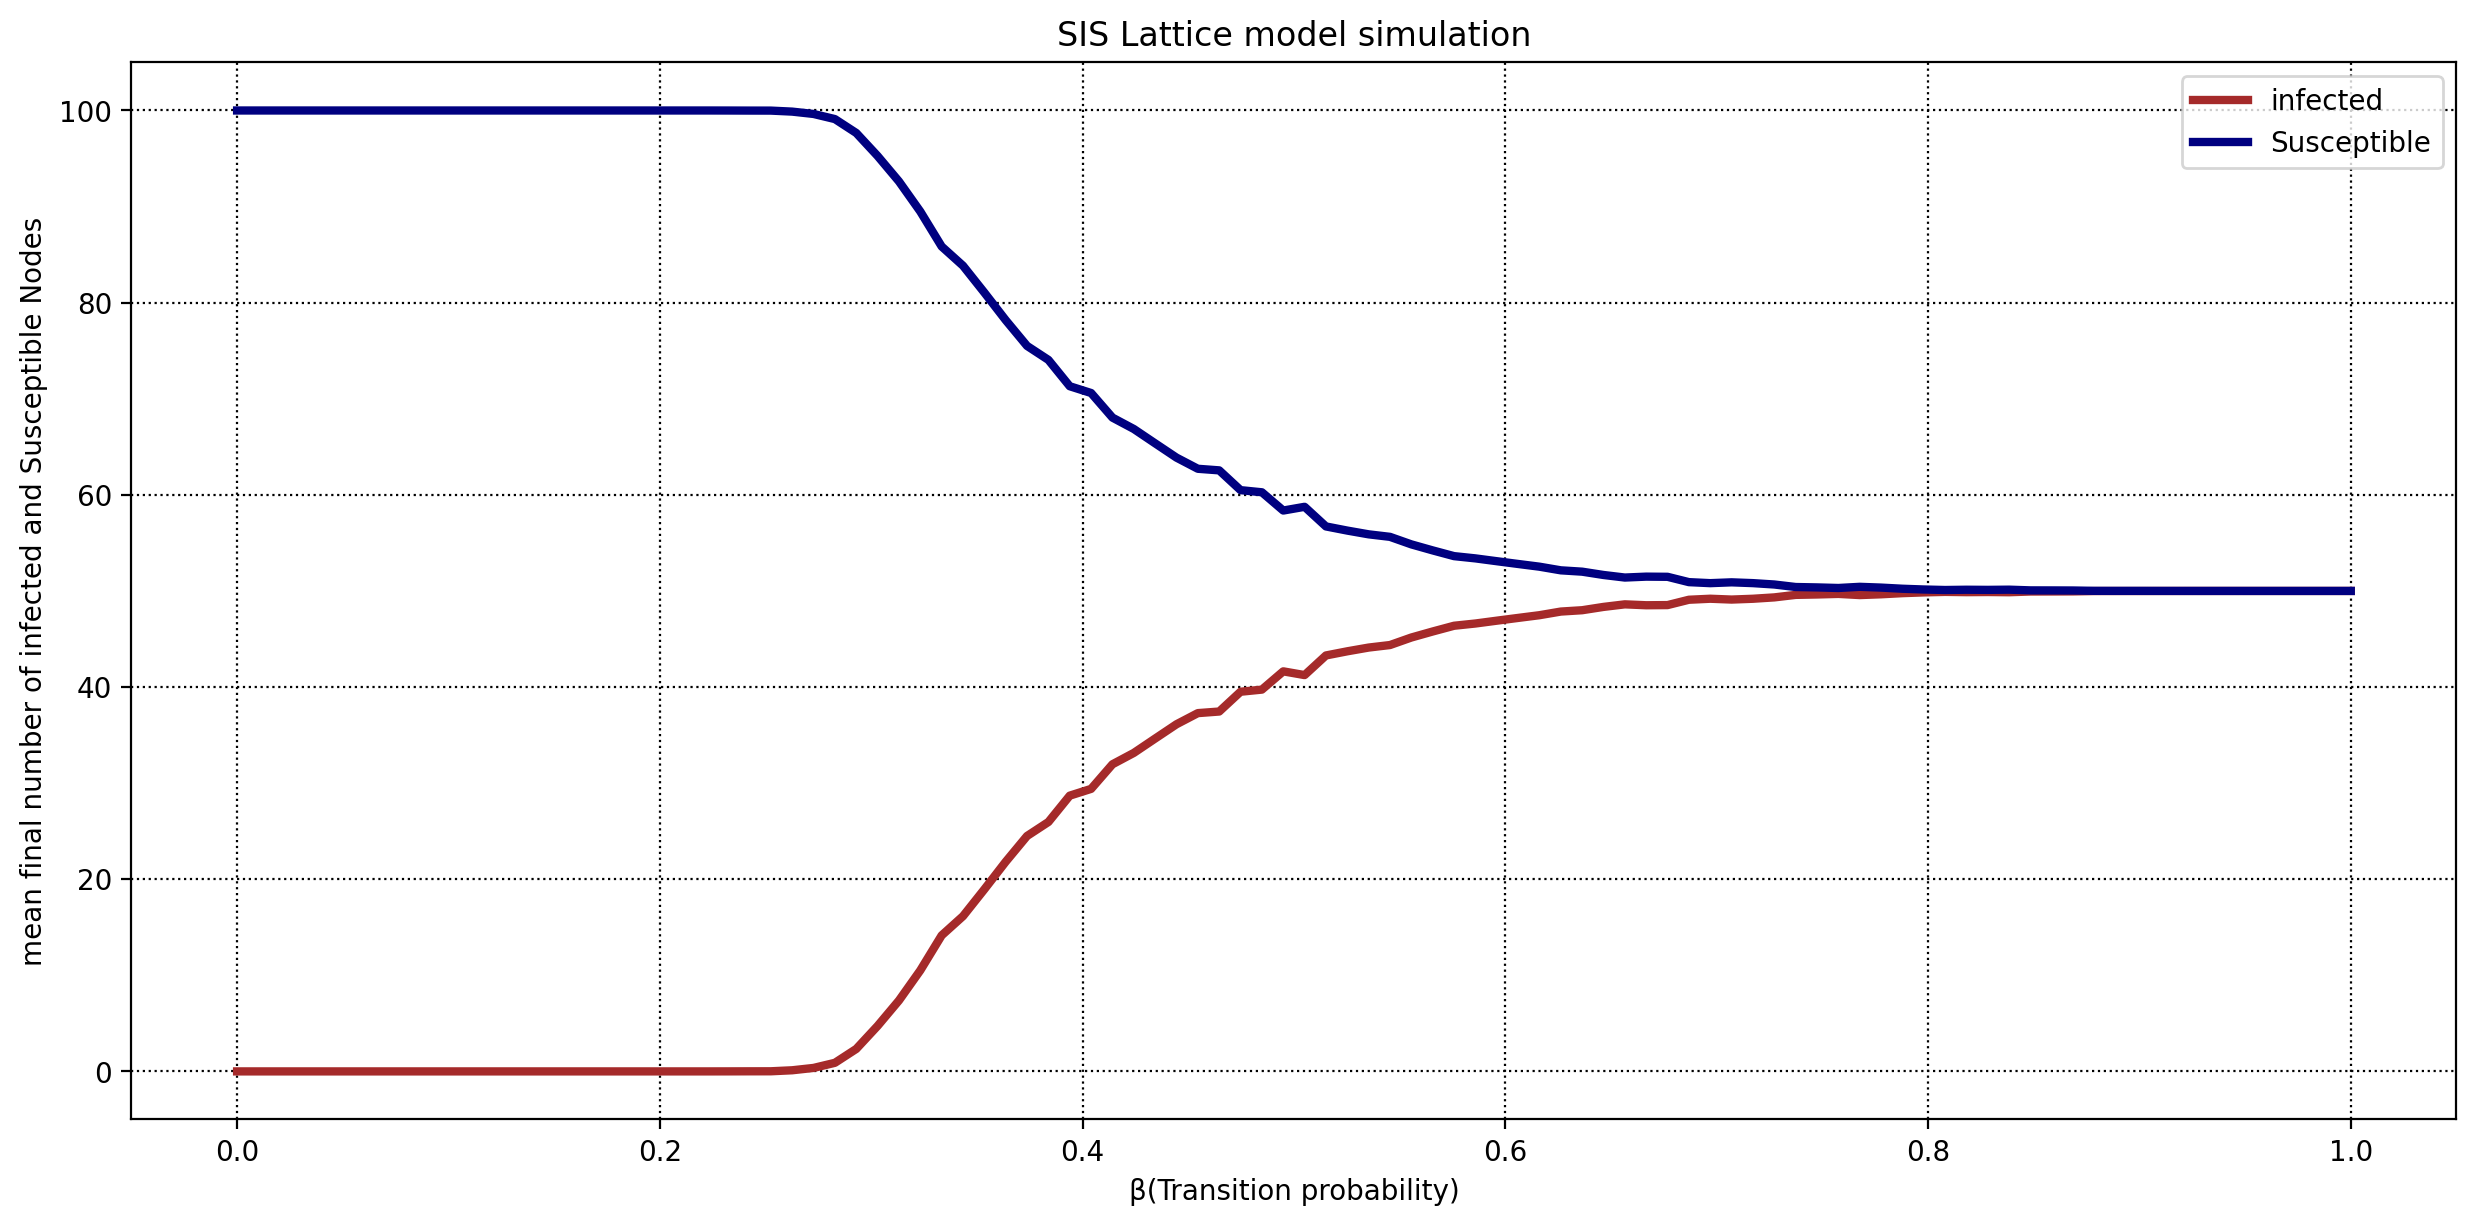

In [20]:
figure(figsize=(15,7),dpi=200)
grid(color = 'k', linestyle = ':')
title("SIS Lattice model simulation")
ylabel("mean final number of infected and Susceptible Nodes")
xlabel("β(Transition probability)")
plot(betta,inf,c='brown',label='infected',lw=3)
plot(betta,sus,c='navy' ,label='Susceptible',lw=3)
legend()
savefig('3')

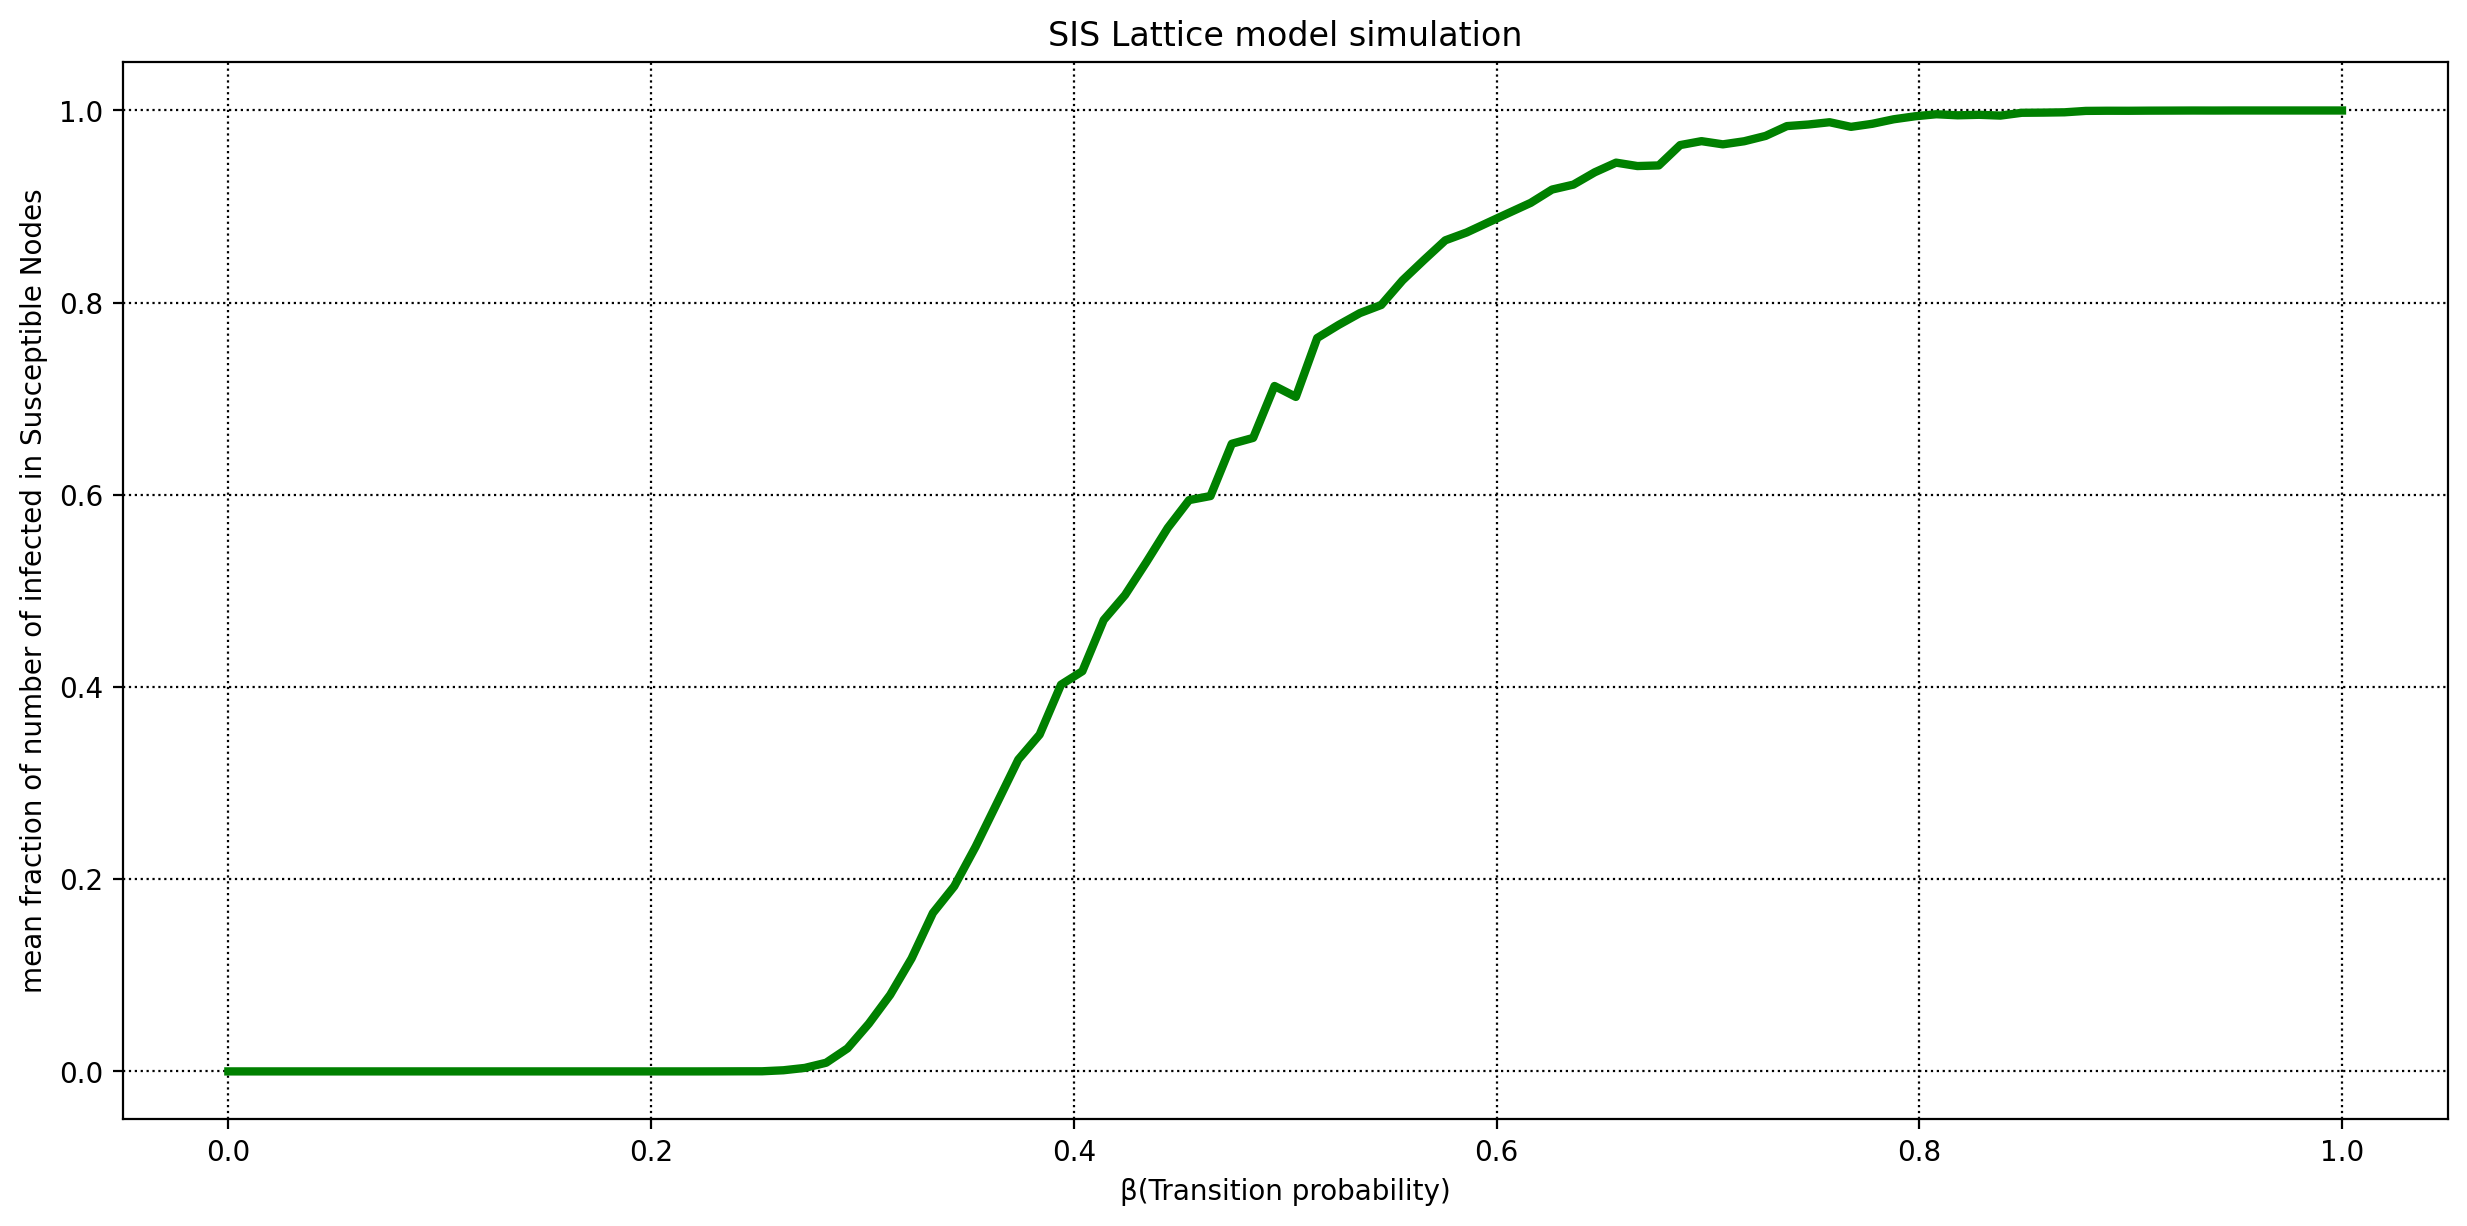

In [21]:
r=[]
for i in range(100):
    r.append(inf[i]/ sus[i])
figure(figsize=(15,7),dpi=200)
grid(color = 'k', linestyle = ':')
title("SIS Lattice model simulation")
ylabel("mean fraction of number of infected in Susceptible Nodes")
xlabel("β(Transition probability)")
plot(betta,r,c='g' ,label='Susceptible',lw=3)
savefig('SISfrt')